# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

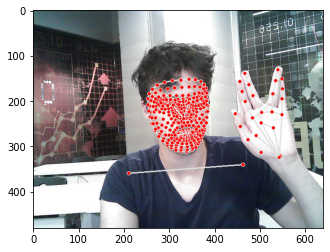

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.52004975,  0.49956378, -0.68091959, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.52004975,  0.49956378, -0.68091959, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['aktifdegil', 'icmek', 'aktif','kimseyok'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

secili = np.array(['icmek'])

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
for action in secili: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in secili:
        # Loop through sequences aka videos
        for sequence in range(30):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length,60):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(30,60):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'konusmak': 0, 'icmek': 1, 'aktif': 2, 'kimseyok': 3}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(120, 30, 1662)

In [33]:
np.array(labels).shape

(120,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(120, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
y_test.shape

(6, 4)

# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import os

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
import tensorflow as tf
checkpoint_filepath = 'model/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    mode='max',
    save_best_only=True)
metric='categorical_accuracy'
cp_save=tf.keras.callbacks.ModelCheckpoint(filepath=r"model/{}".format('actionnew.h5'), monitor=metric,
                    verbose=2, save_best_only=True, mode='max')

In [ ]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback,cp_save],validation_data=(X_test,y_test))

Epoch 1/1500
4/4 [==============================] - ETA: 0s - loss: 1.4684 - categorical_accuracy: 0.2895
Epoch 1: categorical_accuracy improved from -inf to 0.28947, saving model to model\actionnew.h5
4/4 [==============================] - 5s 605ms/step - loss: 1.4684 - categorical_accuracy: 0.2895 - val_loss: 2.6839 - val_categorical_accuracy: 0.3333
Epoch 2/1500
4/4 [==============================] - ETA: 0s - loss: 1.7637 - categorical_accuracy: 0.3509
Epoch 2: categorical_accuracy improved from 0.28947 to 0.35088, saving model to model\actionnew.h5
4/4 [==============================] - 2s 554ms/step - loss: 1.7637 - categorical_accuracy: 0.3509 - val_loss: 2.1932 - val_categorical_accuracy: 0.3333
Epoch 3/1500
4/4 [==============================] - ETA: 0s - loss: 1.5207 - categorical_accuracy: 0.3860
Epoch 3: categorical_accuracy improved from 0.35088 to 0.38596, saving model to model\actionnew.h5
4/4 [==============================] - 1s 365ms/step - loss: 1.5207 - categorical_

4/4 [==============================] - ETA: 0s - loss: 1.1878 - categorical_accuracy: 0.4561
Epoch 25: categorical_accuracy did not improve from 0.79825
4/4 [==============================] - 1s 283ms/step - loss: 1.1878 - categorical_accuracy: 0.4561 - val_loss: 1.0728 - val_categorical_accuracy: 0.6667
Epoch 26/1500
4/4 [==============================] - ETA: 0s - loss: 0.9562 - categorical_accuracy: 0.6053
Epoch 26: categorical_accuracy did not improve from 0.79825
4/4 [==============================] - 1s 306ms/step - loss: 0.9562 - categorical_accuracy: 0.6053 - val_loss: 1.0411 - val_categorical_accuracy: 0.3333
Epoch 27/1500
4/4 [==============================] - ETA: 0s - loss: 0.9428 - categorical_accuracy: 0.6579
Epoch 27: categorical_accuracy did not improve from 0.79825
4/4 [==============================] - 1s 283ms/step - loss: 0.9428 - categorical_accuracy: 0.6579 - val_loss: 0.8904 - val_categorical_accuracy: 0.8333
Epoch 28/1500
4/4 [==============================] - E

4/4 [==============================] - ETA: 0s - loss: 0.1160 - categorical_accuracy: 0.9737
Epoch 50: categorical_accuracy improved from 0.96491 to 0.97368, saving model to model\actionnew.h5
4/4 [==============================] - 2s 610ms/step - loss: 0.1160 - categorical_accuracy: 0.9737 - val_loss: 0.1931 - val_categorical_accuracy: 1.0000
Epoch 51/1500
4/4 [==============================] - ETA: 0s - loss: 0.0998 - categorical_accuracy: 0.9649
Epoch 51: categorical_accuracy did not improve from 0.97368
4/4 [==============================] - 1s 329ms/step - loss: 0.0998 - categorical_accuracy: 0.9649 - val_loss: 0.1738 - val_categorical_accuracy: 1.0000
Epoch 52/1500
4/4 [==============================] - ETA: 0s - loss: 0.0593 - categorical_accuracy: 0.9912
Epoch 52: categorical_accuracy improved from 0.97368 to 0.99123, saving model to model\actionnew.h5
4/4 [==============================] - 2s 627ms/step - loss: 0.0593 - categorical_accuracy: 0.9912 - val_loss: 0.6579 - val_cat

4/4 [==============================] - ETA: 0s - loss: 164.6899 - categorical_accuracy: 0.3684
Epoch 75: categorical_accuracy did not improve from 1.00000
4/4 [==============================] - 1s 340ms/step - loss: 164.6899 - categorical_accuracy: 0.3684 - val_loss: 97.6324 - val_categorical_accuracy: 0.3333
Epoch 76/1500
4/4 [==============================] - ETA: 0s - loss: 74.1633 - categorical_accuracy: 0.4386
Epoch 76: categorical_accuracy did not improve from 1.00000
4/4 [==============================] - 1s 340ms/step - loss: 74.1633 - categorical_accuracy: 0.4386 - val_loss: 29.4039 - val_categorical_accuracy: 0.1667
Epoch 77/1500
4/4 [==============================] - ETA: 0s - loss: 89.0503 - categorical_accuracy: 0.3947
Epoch 77: categorical_accuracy did not improve from 1.00000
4/4 [==============================] - 1s 336ms/step - loss: 89.0503 - categorical_accuracy: 0.3947 - val_loss: 99.9112 - val_categorical_accuracy: 0.3333
Epoch 78/1500
4/4 [========================

In [ ]:
model.summary()

In [65]:
np.array(X_test)

array([[[ 0.46335322,  0.43050745, -0.82812434, ...,  0.48921973,
          0.72452724, -0.06808087],
        [ 0.4629496 ,  0.42661649, -1.08919108, ...,  0.49367702,
          0.72528368, -0.06677479],
        [ 0.46283674,  0.42559963, -1.12380683, ...,  0.49581206,
          0.72021842, -0.06308603],
        ...,
        [ 0.56755066,  0.34329477, -0.33209577, ...,  0.72919619,
          0.53840154, -0.01742066],
        [ 0.56984222,  0.34359971, -0.33506638, ...,  0.730165  ,
          0.54662824, -0.02260806],
        [ 0.5688197 ,  0.34320644, -0.32175237, ...,  0.72936571,
          0.55174983, -0.0213532 ]],

       [[ 0.3945145 ,  0.41751772, -0.4232401 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.39418429,  0.41748416, -0.42616892, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.3958438 ,  0.41529357, -0.42435947, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.38259476,  0.41718405, -0.48204684, ...,  

1/1 [==============================] - 0s 35ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [9]:
model.save('action.h5')

In [62]:
del model

In [10]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [11]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 266ms/step


In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [74]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [1, 0]],

       [[2, 2],
        [1, 1]],

       [[5, 1],
        [0, 0]],

       [[3, 0],
        [1, 2]]], dtype=int64)

In [75]:
accuracy_score(ytrue, yhat)

0.5

# 11. Test in Real Time

In [12]:
from scipy import stats

In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [78]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [16]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'mediapipe_detection' is not defined